In [1]:
import tensorflow as tf
import zipfile,os
import matplotlib.pyplot as plt
import sklearn.metrics
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karlinasuryaw","key":"4b25df087617c23a6203986c330800eb"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download karlinasuryaw/chestxraydataset

 97% 173M/179M [00:01<00:00, 116MB/s]
100% 179M/179M [00:01<00:00, 129MB/s]


In [8]:
! unzip chestxraydataset.zip

Archive:  chestxraydataset.zip
  inflating: dataset/covid/COVID-1.png  
  inflating: dataset/covid/COVID-10.png  
  inflating: dataset/covid/COVID-100.png  
  inflating: dataset/covid/COVID-1000.png  
  inflating: dataset/covid/COVID-1001.png  
  inflating: dataset/covid/COVID-1002.png  
  inflating: dataset/covid/COVID-1003.png  
  inflating: dataset/covid/COVID-1004.png  
  inflating: dataset/covid/COVID-1005.png  
  inflating: dataset/covid/COVID-1006.png  
  inflating: dataset/covid/COVID-1007.png  
  inflating: dataset/covid/COVID-1008.png  
  inflating: dataset/covid/COVID-1009.png  
  inflating: dataset/covid/COVID-101.png  
  inflating: dataset/covid/COVID-1010.png  
  inflating: dataset/covid/COVID-1011.png  
  inflating: dataset/covid/COVID-1012.png  
  inflating: dataset/covid/COVID-1013.png  
  inflating: dataset/covid/COVID-1014.png  
  inflating: dataset/covid/COVID-1015.png  
  inflating: dataset/covid/COVID-1016.png  
  inflating: dataset/covid/COVID-1017.png  
  inflat

In [9]:
base_dir = '/content/dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [10]:
!pip install split_folders
import splitfolders

In [11]:
splitfolders.ratio('/content/dataset', '/content/process/data', seed=1, ratio=(.6, .4))

Copying files: 4500 files [00:01, 3712.45 files/s]


In [12]:
base_dir = '/content/process/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
os.listdir('/content/process/data/train')
os.listdir('/content/process/data/val')

['normal', 'pneunomia', 'covid']

In [13]:
#Train Set
train_normal_dir = os.path.join(train_dir, 'normal')
train_pneunomia_dir = os.path.join(train_dir, 'pneunomia')
train_covid_dir = os.path.join(train_dir, 'covid')

In [14]:
#Validation Set
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_pneunomia_dir = os.path.join(validation_dir, 'pneunomia')
validation_covid_dir = os.path.join(validation_dir, 'covid')

In [15]:
train_datagen = ImageDataGenerator(
  rescale=1./255, 
  shear_range=0.2, 
  zoom_range=0.2, 
  horizontal_flip=True) 

In [16]:
test_datagen = ImageDataGenerator(
  rescale=1./255,
  shear_range=0.2, 
  zoom_range=0.2,
  horizontal_flip=True)

In [17]:
train_generator = train_datagen.flow_from_directory(
  train_dir, #direktori data latihnya
  target_size=(150, 150), #Mengubah Resolusi 
  batch_size=64, 
  color_mode='rgb', #Menggunakan Rgb
  class_mode='categorical', 
  shuffle = True, 
  seed=42)

validation_generator = test_datagen.flow_from_directory(
  validation_dir, #direktori data validasii
  target_size=(150, 150),
  batch_size=64,
  color_mode='rgb',
  class_mode='categorical',
  shuffle = True,
  seed=42)

Found 2700 images belonging to 3 classes.
Found 1800 images belonging to 3 classes.


In [18]:
sample_train_images, _ = next(train_generator)
sample_val_images, _ = next(validation_generator)

In [19]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

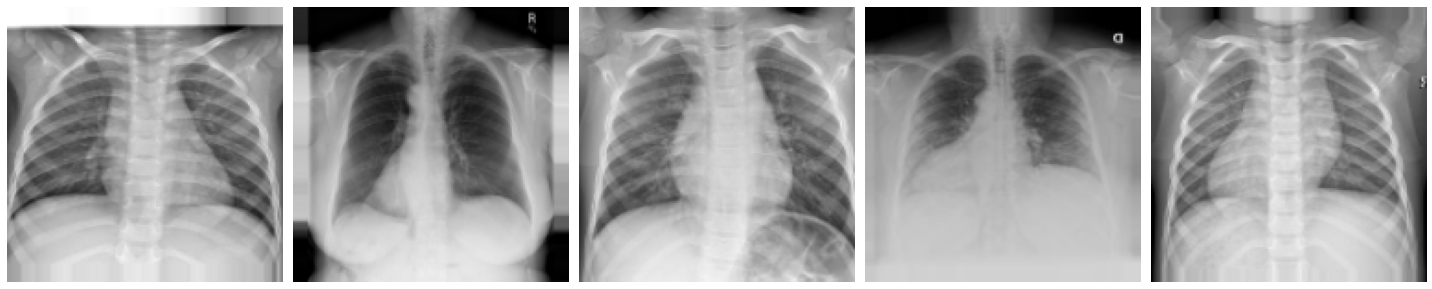

In [20]:
plotImages(sample_train_images[:6])

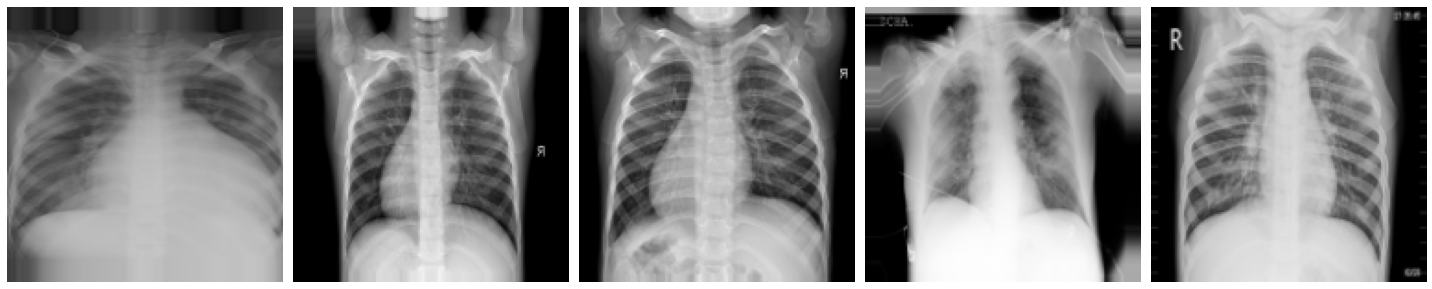

In [21]:
plotImages(sample_val_images[:6])

In [22]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape= (150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3), activation= 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      #tf.keras.layers.Conv2D(32,(3,3), activation= 'relu'),
      #tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.6),
      tf.keras.layers.Dense(256, activation= 'relu'),
      tf.keras.layers.Dense(3, activation= 'softmax')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [24]:
model.compile(optimizer = 'Adam',
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])

In [25]:
#train = model.fit(train_generator, 
#          steps_per_epoch=20, 
#          epochs=20, 
#          validation_data=validation_generator,
#          validation_steps=5,
#          verbose=1)

import math

batch_size=64
train_size=2700
validation_size=1800

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

#menghitung nilai step per epoch dan val step
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))
steps_per_epoch = compute_steps_per_epoch(train_size)
val_steps = compute_steps_per_epoch(validation_size)

base_model = model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_steps=val_steps,
    validation_data=validation_generator,
    verbose=1)

Epoch 1/20
43/43 [==============================] - 100s 2s/step - loss: 0.8253 - accuracy: 0.6189 - val_loss: 0.4987 - val_accuracy: 0.8233
Epoch 2/20
43/43 [==============================] - 98s 2s/step - loss: 0.5467 - accuracy: 0.7859 - val_loss: 0.4221 - val_accuracy: 0.8444
Epoch 3/20
43/43 [==============================] - 98s 2s/step - loss: 0.4866 - accuracy: 0.8144 - val_loss: 0.3944 - val_accuracy: 0.8550
Epoch 4/20
43/43 [==============================] - 98s 2s/step - loss: 0.4279 - accuracy: 0.8356 - val_loss: 0.3789 - val_accuracy: 0.8722
Epoch 5/20
43/43 [==============================] - 98s 2s/step - loss: 0.3836 - accuracy: 0.8670 - val_loss: 0.3188 - val_accuracy: 0.8867
Epoch 6/20
43/43 [==============================] - 97s 2s/step - loss: 0.3954 - accuracy: 0.8530 - val_loss: 0.3148 - val_accuracy: 0.8917
Epoch 7/20
43/43 [==============================] - 97s 2s/step - loss: 0.3488 - accuracy: 0.8719 - val_loss: 0.3201 - val_accuracy: 0.8867
Epoch 8/20
43/43 [=

In [26]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

43/43 [==============================] - 36s 835ms/step - loss: 0.2201 - accuracy: 0.9196
Loss: 0.2201
Accuracy: 0.9196


In [27]:
score = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

29/29 [==============================] - 24s 821ms/step - loss: 0.2203 - accuracy: 0.9233
Loss: 0.2203
Accuracy: 0.9233


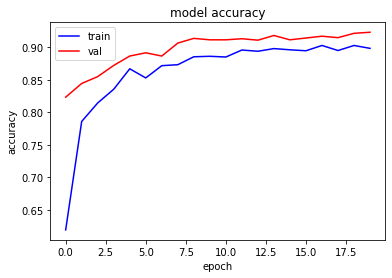

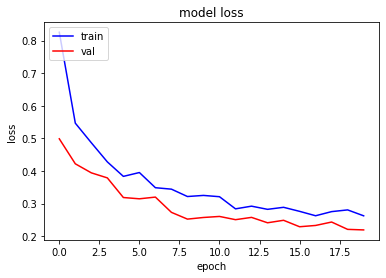

In [28]:
acc = base_model.history['accuracy']
val_acc = base_model.history['val_accuracy']
loss = base_model.history['loss']
val_loss = base_model.history['val_loss']
plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

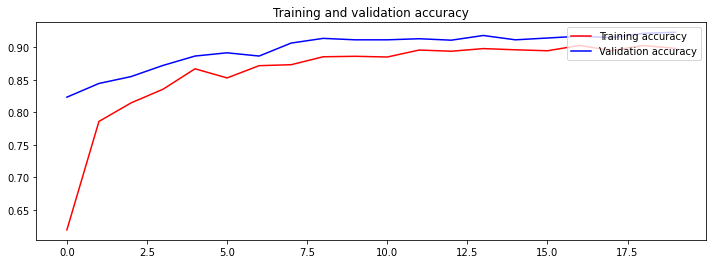

<Figure size 432x288 with 0 Axes>

In [29]:
acc2 = base_model.history['accuracy']
val_acc2 = base_model.history['val_accuracy']
loss = base_model.history['loss']
val_loss = base_model.history['val_loss']

epochs = range(len(acc2))

plt.figure(figsize=(12, 4))
plt.plot(epochs, acc2, 'r', label='Training accuracy')
plt.plot(epochs, val_acc2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='upper right')
plt.figure()


plt.show()

In [30]:
Y_pred = model.predict(validation_generator, 64+1)
y_pred = np.argmax(Y_pred, axis=1)

In [31]:
print('Classification Report')
target_names = ['normal', 'pneunomia', 'covid']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      normal       0.32      0.33      0.33       600
   pneunomia       0.31      0.31      0.31       600
       covid       0.32      0.31      0.31       600

    accuracy                           0.32      1800
   macro avg       0.32      0.32      0.32      1800
weighted avg       0.32      0.32      0.32      1800



In [32]:
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
confusion_array = sklearn.metrics.confusion_matrix(validation_generator.classes, y_pred)

print('True Negative = ', confusion_array[0,0])
print('False Negative = ', confusion_array[1,0])
print('True Positive = ', confusion_array[1,1])
print('False Positive = ', confusion_array[0,1])

Confusion Matrix
[[200 208 192]
 [208 186 206]
 [217 198 185]]
True Negative =  200
False Negative =  208
True Positive =  186
False Positive =  208


In [33]:
print('Classification Report')
target_names = ['normal', 'pneunomia', 'covid']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      normal       0.32      0.33      0.33       600
   pneunomia       0.31      0.31      0.31       600
       covid       0.32      0.31      0.31       600

    accuracy                           0.32      1800
   macro avg       0.32      0.32      0.32      1800
weighted avg       0.32      0.32      0.32      1800



In [34]:
evaluation = pd.DataFrame({'Model': [],
                           'Data_Train': [],
                           'Data_Valid': [],
                           'Epochs': [],
                           'Batch_Size': [],
                           'Loss': [],
                           'Accuracy': []
})

r = evaluation.shape[0]
evaluation.loc[r] = ['CNN', train_generator.n, validation_generator.n, 20, 64, score[0], score[1]]
evaluation

,Model,Data_Train,Data_Valid,Epochs,Batch_Size,Loss,Accuracy
0,CNN,2700.0,1800.0,20.0,64.0,0.220342,0.923333


In [35]:
dict = {"Model" : evaluation.Model, 
        "Data Train" : evaluation.Data_Train, 
        "Data Valid" : evaluation.Data_Valid, 
        "Epochs" : evaluation.Epochs, 
        "Batch Size" : evaluation.Batch_Size, 
        "Loss" : evaluation.Loss, 
        "Accuracy" : evaluation.Accuracy}

Saving person1234_bacteria_3190.jpeg to person1234_bacteria_3190.jpeg
pneunomia


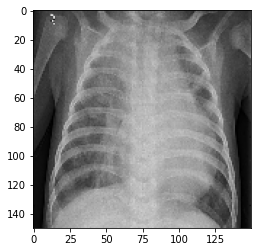

In [36]:
%matplotlib inline
uploaded = files.upload()
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=64)

  if classes[0,0]!=0:
    print('covid')
  elif classes[0,1]!=0:
    print('normal')
  else:
    print('pneunomia')

In [37]:
model.save("model.h5")